# Install necessary libraries using pip


In [64]:
pip install numpy

In [1]:
pip install pandas

In [5]:
pip install scikit-learn

In [6]:
pip install tensorflow


# Import required libraries




In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

#  Read the dataset from a CSV file and display the first few rows


In [9]:
df = pd.read_csv('car_purchasing.csv',encoding='ISO-8859-1')

In [10]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Define a list of columns to drop from the DataFrame


In [11]:
columns_to_drop = ['customer name', 'customer e-mail', 'country']
new_df = df.drop(columns=columns_to_drop)

In [12]:
new_df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Apply Min-Max scaling to the 'age' column in the DataFrame


In [25]:
#standard_scaler = StandardScaler()
#new_df['age_standard_scaled'] = standard_scaler.fit_transform(new_df[['age']])
min_max_scaler = MinMaxScaler()
new_df['age'] = min_max_scaler.fit_transform(new_df[['age']])

In [18]:
new_df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,age_standard_scaled,age_min_max_scaled
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,-0.550749,0.437034
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,-0.673834,0.417412
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,-0.387508,0.463058
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,1.509206,0.765427
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,1.389066,0.746275


# Import Matplotlib for data visualization


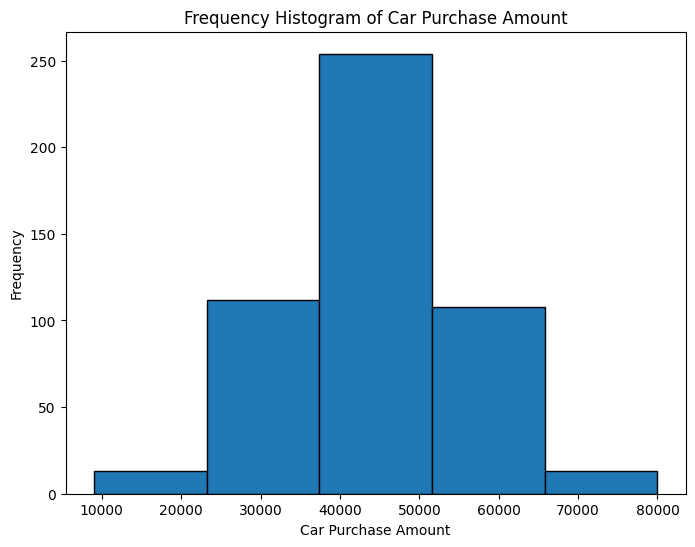

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot the frequency histogram
plt.figure(figsize=(8, 6))
plt.hist(df['car purchase amount'], bins=5, edgecolor='k')
plt.xlabel('Car Purchase Amount')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Car Purchase Amount')
plt.show()

# Create a frequency histogram for the 'car purchase amount' column


# Apply Standard Scaling to specific columns in the DataFrame


In [23]:
salary_scaler = StandardScaler()
debt_scaler = StandardScaler()
net_worth_scaler = StandardScaler()
new_df['annual Salary'] = salary_scaler.fit_transform(new_df[['annual Salary']])
new_df['credit card debt'] = debt_scaler.fit_transform(new_df[['credit card debt']])
new_df['net worth'] = net_worth_scaler.fit_transform(new_df[['net worth']])



In [26]:
new_df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,age_standard_scaled,age_min_max_scaled
0,0,0.437034,0.058576,0.574271,-1.110469,35321.45877,-0.550749,0.437034
1,0,0.417412,0.386570,-0.009951,0.573929,45115.52566,-0.673834,0.417412
2,1,0.463058,-0.712361,0.445452,1.193976,42925.70921,-0.387508,0.463058
3,1,0.765427,1.474794,1.382369,0.675595,67422.36313,1.509206,0.765427
4,1,0.746275,-0.205111,-1.218962,0.743113,55915.46248,1.389066,0.746275


In [27]:
new_df = new_df.iloc[:, :-2]


In [29]:
new_df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,0.437034,0.058576,0.574271,-1.110469,35321.45877
1,0,0.417412,0.386570,-0.009951,0.573929,45115.52566
2,1,0.463058,-0.712361,0.445452,1.193976,42925.70921
3,1,0.765427,1.474794,1.382369,0.675595,67422.36313
4,1,0.746275,-0.205111,-1.218962,0.743113,55915.46248


# Create a Random Forest Regressor model and fit it to the data
# Calculate and print feature importances in descending order

In [31]:
X = new_df.drop('car purchase amount', axis=1)
y = new_df['car purchase amount']
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
top_features = X.columns[sorted_indices[:3]]
print(top_features)


Index(['age', 'annual Salary', 'net worth'], dtype='object')


# Split the data into training and testing sets


In [48]:
from sklearn.model_selection import train_test_split
X = new_df[['age', 'annual Salary', 'net worth']]
y = new_df['car purchase amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Sequential model for neural network


In [36]:
model =  Sequential()
model.add(Dense(2 , input_dim=3 , activation= 'relu' ))
model.add(Dense(1, activation = 'linear'))

# Compile the neural network model


In [40]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

# Fit the model using the original data


In [45]:
orginal_X = df[['age', 'annual Salary', 'net worth']]
orginal_y = df['car purchase amount']
model.fit(
    orginal_X , orginal_y ,
    epochs = 50 ,
    batch_size = 3 ,
    verbose = 1
)


Epoch 1/50
167/167 [==============================] - 1s 3ms/step - loss: -674150.3750 - accuracy: 0.0000e+00
Epoch 2/50
167/167 [==============================] - 1s 4ms/step - loss: -674150.4375 - accuracy: 0.0000e+00
Epoch 3/50
167/167 [==============================] - 1s 4ms/step - loss: -674150.3750 - accuracy: 0.0000e+00
Epoch 4/50
167/167 [==============================] - 1s 4ms/step - loss: -674150.4375 - accuracy: 0.0000e+00
Epoch 5/50
167/167 [==============================] - 1s 4ms/step - loss: -674150.2500 - accuracy: 0.0000e+00
Epoch 6/50
167/167 [==============================] - 1s 3ms/step - loss: -674150.3750 - accuracy: 0.0000e+00
Epoch 7/50
167/167 [==============================] - 1s 4ms/step - loss: -674150.4375 - accuracy: 0.0000e+00
Epoch 8/50
167/167 [==============================] - 1s 3ms/step - loss: -674150.4375 - accuracy: 0.0000e+00
Epoch 9/50
167/167 [==============================] - 1s 3ms/step - loss: -674150.4375 - accuracy: 0.0000e+00
Epoch 10/5

# Fit the model using the training data


In [42]:
model.fit(
    X_train , y_train ,
    epochs = 50 ,
    batch_size = 3 ,
    verbose = 1
)

Epoch 1/50
134/134 [==============================] - 2s 7ms/step - loss: -670128.9375 - accuracy: 0.0000e+00
Epoch 2/50
134/134 [==============================] - 0s 2ms/step - loss: -670128.8125 - accuracy: 0.0000e+00
Epoch 3/50
134/134 [==============================] - 0s 2ms/step - loss: -670128.8750 - accuracy: 0.0000e+00
Epoch 4/50
134/134 [==============================] - 0s 2ms/step - loss: -670128.6875 - accuracy: 0.0000e+00
Epoch 5/50
134/134 [==============================] - 0s 2ms/step - loss: -670128.7500 - accuracy: 0.0000e+00
Epoch 6/50
134/134 [==============================] - 0s 2ms/step - loss: -670128.6875 - accuracy: 0.0000e+00
Epoch 7/50
134/134 [==============================] - 0s 2ms/step - loss: -670128.8750 - accuracy: 0.0000e+00
Epoch 8/50
134/134 [==============================] - 0s 2ms/step - loss: -670128.7500 - accuracy: 0.0000e+00
Epoch 9/50
134/134 [==============================] - 0s 2ms/step - loss: -670128.8750 - accuracy: 0.0000e+00
Epoch 10/5

# Evaluate the model on the testing data


In [61]:
model.evaluate(X_test,y_test,verbose=1)

4/4 [==============================] - 0s 4ms/step - loss: -690237.1250 - accuracy: 0.0000e+00


[-690237.125, 0.0]

# Create a Random Forest Regressor model with 100 estimators and fit it to the training data


In [58]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train,y_train)



0.96004468314316

# Make predictions using the random forest model and calculate the R-squared score


In [ ]:
random_f_pred = random_forest.predict(X_test)
r2_score(y_test,random_f_pred